In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
headers=['Canceled','Month','DepartureTime','UniqueCarrier','SchedElapsedTime','ArrDelay','DepDelay','Distance']
df = pd.read_csv('D:\\Machine learning project\\flight delay completed\\Data_PredictingFlightDelays.csv',names=headers)

In [4]:
df.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,UA,134,0,0,679
1,1,12,830,DL,90,0,0,214
2,1,1,1835,UA,213,0,0,1605
3,1,4,1730,AA,80,0,0,235
4,1,7,1442,UA,103,0,0,413


In [5]:
df.tail()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
5995,0,6,1725,AA,115,17,30,597
5996,0,9,1945,DL,127,-19,-9,752
5997,0,8,1850,DL,101,6,-4,481
5998,0,7,1720,AA,210,178,42,1302
5999,0,9,1955,AA,265,4,3,1721


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
Canceled            6000 non-null int64
Month               6000 non-null int64
DepartureTime       6000 non-null int64
UniqueCarrier       6000 non-null object
SchedElapsedTime    6000 non-null int64
ArrDelay            6000 non-null int64
DepDelay            6000 non-null int64
Distance            6000 non-null int64
dtypes: int64(7), object(1)
memory usage: 375.1+ KB


In [7]:
df.describe()

,Canceled,Month,DepartureTime,SchedElapsedTime,ArrDelay,DepDelay,Distance
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.166667,6.220167,1330.466500,161.693500,8.113000,9.148833,987.588833
std,0.372709,3.436325,459.118234,78.064979,35.763134,31.669299,646.666931
min,0.000000,1.000000,5.000000,40.000000,-72.000000,-16.000000,68.000000
25%,0.000000,3.000000,930.000000,105.000000,-8.000000,-3.000000,547.000000
50%,0.000000,6.000000,1325.000000,145.000000,0.000000,0.000000,837.000000
75%,0.000000,9.000000,1715.000000,200.000000,10.000000,6.000000,1249.000000
max,1.000000,12.000000,2359.000000,604.000000,410.000000,387.000000,4502.000000


Text(0.5,1,'Canceled Distribution')

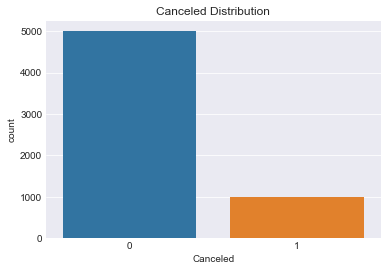

In [8]:
sns.set_style('darkgrid')
ax=sns.countplot(df['Canceled'])
ax.set_title("Canceled Distribution")

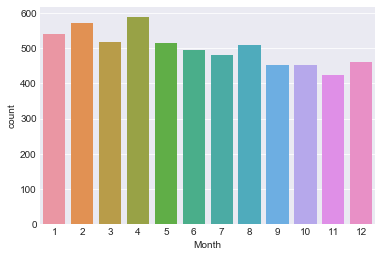

In [9]:
ax=sns.countplot(df['Month'])

In [32]:
df2=df.copy()

In [33]:
from scipy import stats

In [34]:
df2['SchedElapsedTime_transform'] = stats.boxcox(df2['SchedElapsedTime'])[0]

In [35]:
df2.head()


,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance,SchedElapsedTime_transform
0,1,12,814,UA,134,0,0,679,3.979778
1,1,12,830,DL,90,0,0,214,3.716421
2,1,1,1835,UA,213,0,0,1605,4.275034
3,1,4,1730,AA,80,0,0,235,3.636706
4,1,7,1442,UA,103,0,0,413,3.806725


In [36]:
df2.drop(['ArrDelay','DepDelay','Distance','SchedElapsedTime'],axis=1,inplace=True)

In [37]:
df2.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime_transform
0,1,12,814,UA,3.979778
1,1,12,830,DL,3.716421
2,1,1,1835,UA,4.275034
3,1,4,1730,AA,3.636706
4,1,7,1442,UA,3.806725


In [38]:
#Feature Creation
df2=pd.get_dummies(df2)


In [39]:
df2.head()

,Canceled,Month,DepartureTime,SchedElapsedTime_transform,UniqueCarrier_AA,UniqueCarrier_DL,UniqueCarrier_UA
0,1,12,814,3.979778,0,0,1
1,1,12,830,3.716421,0,1,0
2,1,1,1835,4.275034,0,0,1
3,1,4,1730,3.636706,1,0,0
4,1,7,1442,3.806725,0,0,1


In [45]:
def clean_data(df):
    df2=df.copy()
    # Transform SchedElapsedTime
    df2['SchedElapsedTime_transform'] = stats.boxcox(df2['SchedElapsedTime'])[0]

    # Drop unnecessary columns
    df2.drop(['ArrDelay','DepDelay','Distance','SchedElapsedTime'],axis=1,inplace=True)
    
    # Create dummy variables
    df2 = pd.get_dummies(df2)
    
    # Return cleaned dataframe
    return df2

In [46]:
df1 = clean_data(df)


In [48]:
test=(df1 == df2)
test.drop_duplicates(inplace=True)
test.head()

,Canceled,Month,DepartureTime,SchedElapsedTime_transform,UniqueCarrier_AA,UniqueCarrier_DL,UniqueCarrier_UA
0,True,True,True,True,True,True,True


In [49]:
from sklearn.model_selection import train_test_split


In [51]:
y=df1['Canceled']
X=df1.drop('Canceled',axis=1)
print(X)

      Month  DepartureTime  SchedElapsedTime_transform  UniqueCarrier_AA  \
0        12            814                    3.979778                 0   
1        12            830                    3.716421                 0   
2         1           1835                    4.275034                 0   
3         4           1730                    3.636706                 1   
4         7           1442                    3.806725                 0   
5         2            820                    3.902191                 0   
6         1           1430                    3.545329                 0   
7         4            930                    4.073827                 1   
8         4           1550                    3.960049                 1   
9         6           1725                    3.896645                 0   
10        3           1615                    3.787032                 1   
11        4           1010                    3.934438                 1   
12        9 

In [52]:
print(y)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
5970    0
5971    0
5972    0
5973    0
5974    0
5975    0
5976    0
5977    0
5978    0
5979    0
5980    0
5981    0
5982    0
5983    0
5984    0
5985    0
5986    0
5987    0
5988    0
5989    0
5990    0
5991    0
5992    0
5993    0
5994    0
5995    0
5996    0
5997    0
5998    0
5999    0
Name: Canceled, Length: 6000, dtype: int64


In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV


In [54]:
kfold=StratifiedKFold(n_splits=10,random_state=888)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=888)
lr_model=LogisticRegressionCV(cv=kfold,class_weight='balanced',random_state=888)
lr_model.fit(X_train,y_train)


LogisticRegressionCV(Cs=10, class_weight='balanced',
           cv=StratifiedKFold(n_splits=10, random_state=888, shuffle=False),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=888, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report

In [58]:
def print_eval_scores(model, X_train, y_train, cv):
    accuracy = cross_val_score(model, X_train, y_train, cv=cv,scoring='accuracy')
    log_loss = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_log_loss')
    roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

    print('Mean Accuracy: %s' % accuracy.mean())
    print('Mean Log Loss: %s' % log_loss.mean())
    print('Mean Area Under ROC Curve: %s' % roc_auc.mean())
    
print_eval_scores(lr_model, X_train, y_train, kfold)

Mean Accuracy: 0.589377464022558
Mean Log Loss: -0.6646552699211862
Mean Area Under ROC Curve: 0.6360609846534241


In [59]:
lr_model.score(X_test,y_test)

0.5883333333333334

In [60]:
y_pred_lr=lr_model.predict(X_test)


In [62]:
print(y_pred_lr)

[1 1 0 ... 1 1 1]


In [63]:
print(classification_report(y_test,y_pred_lr))

             precision    recall  f1-score   support

          0       0.88      0.58      0.70       984
          1       0.25      0.64      0.36       216

avg / total       0.77      0.59      0.64      1200



In [64]:
lr_cm=confusion_matrix(y_test,y_pred_lr)


Text(0.5,19.5,'Predicted Label')

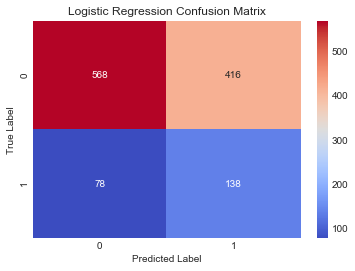

In [65]:
ax = sns.heatmap(lr_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

In [67]:
import pickle
lr_model_pickled=pickle.dumps(lr_model)

In [68]:
print(lr_model)

LogisticRegressionCV(Cs=10, class_weight='balanced',
           cv=StratifiedKFold(n_splits=10, random_state=888, shuffle=False),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=888, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)


In [69]:
from sklearn.ensemble import RandomForestClassifier


In [70]:
rfc_model=RandomForestClassifier(n_estimators=100,random_state=888,class_weight='balanced')
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=888,
            verbose=0, warm_start=False)

In [72]:
print_eval_scores(rfc_model,X_train,y_train,kfold)


Mean Accuracy: 0.8014580720113079
Mean Log Loss: -0.6970414502762601
Mean Area Under ROC Curve: 0.6233896270367534


In [73]:
rfc_model.score(X_test,y_test)


0.8008333333333333

In [75]:
y_pred_rfc = rfc_model.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred_rfc))

             precision    recall  f1-score   support

          0       0.83      0.95      0.89       984
          1       0.35      0.12      0.18       216

avg / total       0.75      0.80      0.76      1200



Text(0.5,19.5,'Predicted Label')

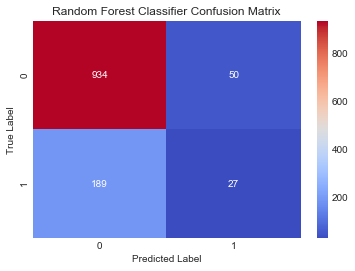

In [78]:
rfc_cm = confusion_matrix(y_test,y_pred_rfc)

ax = sns.heatmap(rfc_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Random Forest Classifier Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
print_eval_scores(knn_model,X_train,y_train,kfold)


Mean Accuracy: 0.8145878978786077
Mean Log Loss: -2.2647147456956334
Mean Area Under ROC Curve: 0.5712342606821881


In [82]:
knn_model.score(X_test,y_test)

0.8025

In [83]:
y_pred_knn = knn_model.predict(X_test)


In [84]:
print(classification_report(y_test, y_pred_rfc))

             precision    recall  f1-score   support

          0       0.83      0.95      0.89       984
          1       0.35      0.12      0.18       216

avg / total       0.75      0.80      0.76      1200



Text(0.5,19.5,'Predicted Label')

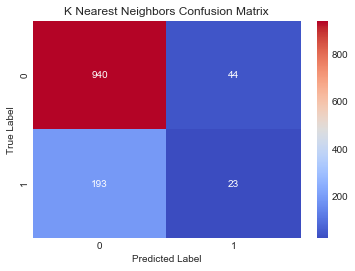

In [85]:
knn_cm = confusion_matrix(y_test,y_pred_knn)

ax = sns.heatmap(knn_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('K Nearest Neighbors Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')